## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [3]:
%pip install wbgapi

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/DATASCIENCE')

import my_func as fn


Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [7]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [8]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [9]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [10]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [11]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


In [12]:
df_wb_raw

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AGO,Angola,Medium-High,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,9.933616,10.165600,67.144,64.617,62.099,8.4,75.0,NaN,NaN,44.7581
194,AND,Andorra,Low,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,68.003820,57.193764,86.107,84.041,82.100,100.0,100.0,NaN,NaN,95.4456
195,DZA,Algeria,High,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,67.258843,44.258295,77.696,76.261,74.895,99.1,99.9,NaN,NaN,76.9081
196,ALB,Albania,Medium-Low,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,77.031527,52.749937,81.446,79.602,77.728,72.5,95.2,81.7239,84.5900,83.1356


#*Mostramos la cantidad de paises, años  y variables disponibles del data frame*

In [13]:
num_countries = df_wb_raw['Country'].nunique()
num_variables = df_wb_raw.shape[1] - 2 # Excluir 'country' y 'Country' que no son variables indicadoras
num_years = 1 # Los datos se descargaron para el año 2023

print(f"Número de países disponibles: {num_countries}")
print(f"Número de años disponibles: {num_years}")
print(f"Número de variables disponibles (indicadores): {num_variables}")

Número de países disponibles: 198
Número de años disponibles: 1
Número de variables disponibles (indicadores): 65


In [14]:
total_observations = df_wb_raw.shape[0]
print(f"Número total de observaciones: {total_observations}")

Número total de observaciones: 198


#**Identificamos las columnas que tienen >15% de valores nulos, si es asi, se eliminan automaticamente. Si son =<15% vemos la forma de imputarlos.*

In [15]:
# Identificar columnas con más del 15% de valores nulos
null_percentages = df_wb_raw.isnull().sum() / len(df_wb_raw) * 100
columns_with_high_nulls = null_percentages[null_percentages > 15].index.tolist()

print("Columnas con más del 15% de valores nulos que se eliminarán:")
if len(columns_with_high_nulls) > 0:
    for col in columns_with_high_nulls:
        print(f"- {col}: {null_percentages[col]:.2f}%")
else:
    print("No hay columnas con más del 15% de valores nulos en el DataFrame actual.")

Columnas con más del 15% de valores nulos que se eliminarán:
- SL.UEM.TOTL.FE.NE.ZS: 46.97%
- SL.UEM.TOTL.MA.NE.ZS: 46.97%
- SL.UEM.TOTL.NE.ZS: 46.97%
- GC.TAX.EXPT.CN: 83.33%
- GC.TAX.EXPT.ZS: 83.33%
- NE.EXP.GNFS.KD.ZG: 20.20%
- NE.EXP.GNFS.KN: 20.20%
- NE.CON.GOVT.KN: 20.20%
- NE.CON.GOVT.ZS: 17.17%
- NE.CON.PRVT.CD: 18.18%
- NE.CON.PRVT.CN: 18.18%
- EG.ELC.LOSS.ZS: 64.65%
- EG.USE.ELEC.KH.PC: 64.14%
- GC.DOD.TOTL.CN: 82.83%
- GC.DOD.TOTL.GD.ZS: 82.83%
- SE.PRM.NENR: 100.00%
- SE.PRM.NENR.FE: 100.00%
- SE.PRM.NENR.MA: 100.00%
- SE.SEC.ENRR: 30.30%
- SE.SEC.ENRR.FE: 31.82%
- SE.SEC.ENRR.MA: 32.32%
- SE.TER.ENRR: 37.88%
- SE.TER.ENRR.FE: 38.38%
- SE.TER.ENRR.MA: 38.38%
- IT.NET.USER.FE.ZS: 71.21%
- IT.NET.USER.MA.ZS: 71.21%


In [16]:
# Eliminar las columnas identificadas con más del 15% de valores nulos
if 'columns_with_high_nulls' in locals() and len(columns_with_high_nulls) > 0:
    df_wb_raw = df_wb_raw.drop(columns=columns_with_high_nulls)
    print(f"Se eliminaron {len(columns_with_high_nulls)} columnas con más del 15% de valores nulos.")
    print("Columnas restantes en el DataFrame después de la eliminación:")
    display(df_wb_raw.head())
else:
    print("No hay columnas para eliminar o no se han identificado previamente.")

Se eliminaron 26 columnas con más del 15% de valores nulos.
Columnas restantes en el DataFrame después de la eliminación:


,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,3.050000e+07,1.684321,0.9636,30.7,65.013,62.775,60.226,7.5,77.0,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.532150e+08,2.324653,1.2905,9.2,68.673,66.349,63.936,2.3,16.8,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,3.159065e+06,0.580098,NaN,NaN,71.502,65.170,59.691,NaN,NaN,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,-1.550000e+09,4.264071,50.1898,98.7,79.264,74.588,69.877,98.7,99.4,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,4.399200e+06,0.830619,0.0011,20.6,73.927,71.477,69.445,9.0,52.3,45.7313


In [17]:
print("Columnas con menos del 15% de valores nulos (candidatas a imputación):")
null_percentages = df_wb_raw.isnull().sum() / len(df_wb_raw) * 100
columns_to_impute = null_percentages[(null_percentages > 0) & (null_percentages <= 15)].index.tolist()

if len(columns_to_impute) > 0:
    for col in columns_to_impute:
        print(f"- {col}: {null_percentages[col]:.2f}%")
else:
    print("No hay columnas con valores nulos entre 0% y 15%.")

Columnas con menos del 15% de valores nulos (candidatas a imputación):
- SL.TLF.TOTL.FE.ZS: 12.63%
- SL.TLF.TOTL.IN: 12.63%
- SL.UEM.TOTL.FE.ZS: 12.63%
- SL.UEM.TOTL.MA.ZS: 12.63%
- SP.RUR.TOTL.ZG: 4.55%
- FP.CPI.TOTL.ZG: 11.62%
- NE.EXP.GNFS.ZS: 14.65%
- NV.AGR.TOTL.CD: 5.56%
- NV.AGR.TOTL.CN: 5.56%
- NV.IND.MANF.CD: 10.10%
- SL.UEM.TOTL.ZS: 12.63%
- GE.EST: 2.02%
- NV.IND.MANF.CN: 10.10%
- NV.IND.TOTL.CD: 5.05%
- NV.IND.TOTL.CN: 5.05%
- NV.SRV.TOTL.CD: 5.05%
- NV.SRV.TOTL.CN: 5.05%
- BM.KLT.DINV.CD.WD: 0.51%
- BX.KLT.DINV.WD.GD.ZS: 1.52%
- EN.GHG.CO2.IP.MT.CE.AR5: 4.04%
- EG.CFT.ACCS.ZS: 8.08%
- EG.CFT.ACCS.RU.ZS: 8.08%
- EG.CFT.ACCS.UR.ZS: 8.08%
- IT.NET.USER.ZS: 10.61%


## Imputar valores faltantes

### Imputación por mediana:
Imputar los valores faltantes en las columnas identificadas (con menos del 15% de nulos) utilizando la mediana. y por knn


In [18]:
print("Realizando imputación con la mediana...")
# Ensure columns_to_impute is available, if not, re-evaluate it
if 'columns_to_impute' not in locals():
    null_percentages = df_wb_raw.isnull().sum() / len(df_wb_raw) * 100
    columns_to_impute = null_percentages[(null_percentages > 0) & (null_percentages <= 15)].index.tolist()

for col in columns_to_impute:
    if df_wb_raw[col].isnull().any(): # Only impute if there are still NaNs
        median_value = df_wb_raw[col].median()
        df_wb_raw[col] = df_wb_raw[col].fillna(median_value)
        print(f"Columna '{col}' imputada con la mediana: {median_value:.2f}")

print("\nVerificación de valores nulos después de la imputación con la mediana:")
# Ensure columns_to_impute is not empty before attempting to check nulls
if columns_to_impute:
    print(df_wb_raw[columns_to_impute].isnull().sum())
else:
    print("No hay columnas para imputar o todas ya fueron imputadas.")

print("\nPrimeras 5 filas del DataFrame después de la imputación con la mediana:")
display(df_wb_raw.head())

print("\nInformación del DataFrame después de la imputación con la mediana:")
df_wb_raw.info()

Realizando imputación con la mediana...
Columna 'SL.TLF.TOTL.FE.ZS' imputada con la mediana: 45.08
Columna 'SL.TLF.TOTL.IN' imputada con la mediana: 4220673.00
Columna 'SL.UEM.TOTL.FE.ZS' imputada con la mediana: 5.53
Columna 'SL.UEM.TOTL.MA.ZS' imputada con la mediana: 4.61
Columna 'SP.RUR.TOTL.ZG' imputada con la mediana: 0.42
Columna 'FP.CPI.TOTL.ZG' imputada con la mediana: 5.87
Columna 'NE.EXP.GNFS.ZS' imputada con la mediana: 37.82
Columna 'NV.AGR.TOTL.CD' imputada con la mediana: 3465342538.48
Columna 'NV.AGR.TOTL.CN' imputada con la mediana: 39711718990.76
Columna 'NV.IND.MANF.CD' imputada con la mediana: 4795876698.63
Columna 'SL.UEM.TOTL.ZS' imputada con la mediana: 5.09
Columna 'GE.EST' imputada con la mediana: -0.06
Columna 'NV.IND.MANF.CN' imputada con la mediana: 113027246500.00
Columna 'NV.IND.TOTL.CD' imputada con la mediana: 11460110902.30
Columna 'NV.IND.TOTL.CN' imputada con la mediana: 207536065000.00
Columna 'NV.SRV.TOTL.CD' imputada con la mediana: 21718325900.19


,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,3.050000e+07,1.684321,0.96360,30.7,65.013,62.775,60.226,7.50,77.0,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.532150e+08,2.324653,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,3.159065e+06,0.580098,1.40855,91.5,71.502,65.170,59.691,84.15,97.6,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,-1.550000e+09,4.264071,50.18980,98.7,79.264,74.588,69.877,98.70,99.4,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,4.399200e+06,0.830619,0.00110,20.6,73.927,71.477,69.445,9.00,52.3,45.7313



Información del DataFrame después de la imputación con la mediana:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   NY.GDP.MKTP.PP.KD        198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SL.TLF.TOTL.FE.ZS        198 non-null    float64 
 1

In [19]:
from sklearn.impute import KNNImputer
import numpy as np


df_wb_knn = df_wb_raw.copy()


numerical_cols_for_knn = df_wb_knn.select_dtypes(include=np.number).columns.tolist()

if 'country' in numerical_cols_for_knn:
    numerical_cols_for_knn.remove('country')
if 'Country' in numerical_cols_for_knn:
    numerical_cols_for_knn.remove('Country')

print(f"Columnas numéricas seleccionadas para imputación KNN: {len(numerical_cols_for_knn)}")


imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')


df_wb_knn[numerical_cols_for_knn] = imputer.fit_transform(df_wb_knn[numerical_cols_for_knn])

print("\nValores nulos después de la imputación KNN (solo columnas numéricas):")
print(df_wb_knn[numerical_cols_for_knn].isnull().sum().sum())

print("\nPrimeras 5 filas del DataFrame después de la imputación KNN:")
display(df_wb_knn.head())

print("\nInformación del DataFrame después de la imputación KNN:")
df_wb_knn.info()

Columnas numéricas seleccionadas para imputación KNN: 38

Valores nulos después de la imputación KNN (solo columnas numéricas):
0

Primeras 5 filas del DataFrame después de la imputación KNN:


,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,3.050000e+07,1.684321,0.96360,30.7,65.013,62.775,60.226,7.50,77.0,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.532150e+08,2.324653,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,3.159065e+06,0.580098,1.40855,91.5,71.502,65.170,59.691,84.15,97.6,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,-1.550000e+09,4.264071,50.18980,98.7,79.264,74.588,69.877,98.70,99.4,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,4.399200e+06,0.830619,0.00110,20.6,73.927,71.477,69.445,9.00,52.3,45.7313



Información del DataFrame después de la imputación KNN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   NY.GDP.MKTP.PP.KD        198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SL.TLF.TOTL.FE.ZS        198 non-null    float64 
 13  SL.TLF.T

In [20]:
for col in columns_to_impute:
    median_value = df_wb_raw[col].median()
    df_wb_raw[col] = df_wb_raw[col].fillna(median_value)
    print(f"Columna '{col}' imputada con la mediana: {median_value:.2f}")

print("\nVerificación de valores nulos después de la imputación:")
print(df_wb_raw[columns_to_impute].isnull().sum())


numerical_cols = df_wb_raw.select_dtypes(include=['number']).columns.tolist()


if 'NY.GDP.MKTP.PP.KD' in numerical_cols:
    numerical_cols.remove('NY.GDP.MKTP.PP.KD')


if 'country' in numerical_cols:
    numerical_cols.remove('country')
if 'Country' in numerical_cols:
    numerical_cols.remove('Country')

outlier_summary = {}

for col in numerical_cols:
    Q1 = df_wb_raw[col].quantile(0.25)
    Q3 = df_wb_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_wb_raw[(df_wb_raw[col] < lower_bound) | (df_wb_raw[col] > upper_bound)]
    if not outliers.empty:
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df_wb_raw)) * 100,
            'min_outlier_value': outliers[col].min(),
            'max_outlier_value': outliers[col].max()
        }

print("\nResumen de Outliers por columna (método IQR):")
if outlier_summary:
    for col, data in outlier_summary.items():
        print(f"- {col}: {data['count']} outliers ({data['percentage']:.2f}% de las observaciones)")
        print(f"  Valores extremos: Mín={data['min_outlier_value']:.2f}, Máx={data['max_outlier_value']:.2f}")
else:
    print("No se encontraron outliers significativos en las columnas numéricas.")

Columna 'SL.TLF.TOTL.FE.ZS' imputada con la mediana: 45.08
Columna 'SL.TLF.TOTL.IN' imputada con la mediana: 4220673.00
Columna 'SL.UEM.TOTL.FE.ZS' imputada con la mediana: 5.53
Columna 'SL.UEM.TOTL.MA.ZS' imputada con la mediana: 4.61
Columna 'SP.RUR.TOTL.ZG' imputada con la mediana: 0.42
Columna 'FP.CPI.TOTL.ZG' imputada con la mediana: 5.87
Columna 'NE.EXP.GNFS.ZS' imputada con la mediana: 37.82
Columna 'NV.AGR.TOTL.CD' imputada con la mediana: 3465342538.48
Columna 'NV.AGR.TOTL.CN' imputada con la mediana: 39711718990.76
Columna 'NV.IND.MANF.CD' imputada con la mediana: 4795876698.63
Columna 'SL.UEM.TOTL.ZS' imputada con la mediana: 5.09
Columna 'GE.EST' imputada con la mediana: -0.06
Columna 'NV.IND.MANF.CN' imputada con la mediana: 113027246500.00
Columna 'NV.IND.TOTL.CD' imputada con la mediana: 11460110902.30
Columna 'NV.IND.TOTL.CN' imputada con la mediana: 207536065000.00
Columna 'NV.SRV.TOTL.CD' imputada con la mediana: 21718325900.19
Columna 'NV.SRV.TOTL.CN' imputada con la

## Generar una tabla de estadísticas descriptivas

Generamos una tabla de estadísticas descriptivas para todas las variables numéricas del DataFrame `df_wb_raw`, incluyendo la media, mediana, desviación estándar, valor mínimo y valor máximo.


In [21]:
numerical_cols = df_wb_raw.select_dtypes(include=['number']).columns
print(f"Columnas numéricas identificadas: {len(numerical_cols)}")

Columnas numéricas identificadas: 38


In [22]:
descriptive_stats = df_wb_raw[numerical_cols].describe().transpose()
print("Tabla de Estadísticas Descriptivas para Variables Numéricas:")
display(descriptive_stats)

Tabla de Estadísticas Descriptivas para Variables Numéricas:


,count,mean,std,min,25%,50%,75%,max
SP.POP.GROW,198.0,1.152752e+00,1.576210e+00,-8.423008e+00,2.828784e-01,1.112108e+00,2.088224e+00,6.527050e+00
SP.POP.TOTL,198.0,3.999611e+07,1.484957e+08,9.816000e+03,1.373786e+06,7.335048e+06,2.936413e+07,1.438070e+09
SP.POP.TOTL.FE.IN,198.0,1.987776e+07,7.252840e+07,4.795000e+03,6.876850e+05,3.672054e+06,1.403224e+07,6.961863e+08
SP.POP.TOTL.FE.ZS,198.0,4.997349e+01,2.993389e+00,2.848374e+01,4.965188e+01,5.032928e+01,5.118944e+01,5.492088e+01
SP.POP.TOTL.MA.IN,198.0,2.011836e+07,7.598056e+07,5.021000e+03,6.826450e+05,3.560820e+06,1.424457e+07,7.418833e+08
SP.POP.TOTL.MA.ZS,198.0,5.002651e+01,2.993389e+00,4.507912e+01,4.881056e+01,4.967072e+01,5.034812e+01,7.151626e+01
SP.URB.GROW,198.0,1.729545e+00,1.826024e+00,-8.348151e+00,4.523152e-01,1.524572e+00,2.700316e+00,8.105580e+00
SP.URB.TOTL,198.0,2.289674e+07,8.019058e+07,6.283000e+03,8.540478e+05,4.463172e+06,1.624560e+07,9.244403e+08
SP.URB.TOTL.IN.ZS,198.0,6.220539e+01,2.272253e+01,1.505810e+01,4.336186e+01,6.362252e+01,7.954610e+01,1.000000e+02
SL.TLF.TOTL.FE.ZS,198.0,4.230033e+01,8.493360e+00,6.846247e+00,4.097022e+01,4.508194e+01,4.735822e+01,5.467084e+01


## Mostrar la distribución del PIB (histograma o boxplot)


Visualizamos la distribución de la variable objetivo 'NY.GDP.MKTP.PP.KD' utilizando un histograma o un boxplot para entender su reparto.


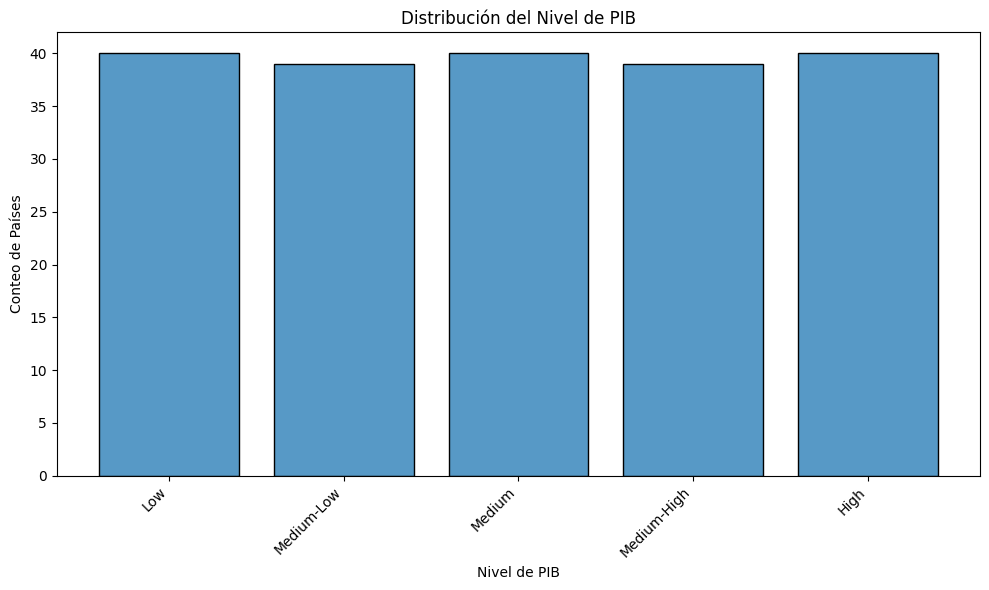

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram (which will act as a count plot for categorical data)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_wb_raw, x='NY.GDP.MKTP.PP.KD', shrink=0.8, stat='count')
plt.title('Distribución del Nivel de PIB')
plt.xlabel('Nivel de PIB')
plt.ylabel('Conteo de Países')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()